# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [2]:
import pandas as pd
import numpy as np
import random
import joblib

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


RANDOM_STATE = 42

np.random.seed(RANDOM_STATE) 

# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [3]:
tracks = pd.read_parquet('tracks.parquet')
catalog_names = pd.read_parquet('catalog_names.parquet')
interactions = pd.read_parquet('interactions.parquet')

# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [4]:
# Что у нас в task?

tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  int64 
 1   albums    1000000 non-null  object
 2   artists   1000000 non-null  object
 3   genres    1000000 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB


In [5]:
# Как выглядят данные

tracks.head()

,track_id,albums,artists,genres
0,26,"[3, 2490753]",[16],"[11, 21]"
1,38,"[3, 2490753]",[16],"[11, 21]"
2,135,"[12, 214, 2490809]",[84],[11]
3,136,"[12, 214, 2490809]",[84],[11]
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11]


In [6]:
# Интересно что это за данные не List похожие

sample_albums = tracks['albums'][0]
sample_genres = tracks['genres'][0]
print(f"образец albums: {sample_albums} Тип данных: {type(sample_albums)}")
print(f"образец genres: {sample_genres} Тип данных: {type(sample_genres)}")
sample_albums

образец albums: [      3 2490753] Тип данных: <class 'numpy.ndarray'>
образец genres: [11 21] Тип данных: <class 'numpy.ndarray'>


array([      3, 2490753])

In [7]:
# Пропуски ?
tracks.isna().sum()

track_id    0
albums      0
artists     0
genres      0
dtype: int64

In [8]:
# А треки у нас точно уникальные
tracks['track_id'].duplicated().value_counts()

track_id
False    1000000
Name: count, dtype: int64

In [9]:
# Для удобства развернем данные в колонках albums, artists, genres

tracks = tracks.explode(['albums']).explode(['artists']).explode(['genres'])
tracks.head(10)

,track_id,albums,artists,genres
0,26,3,16,11
0,26,3,16,21
0,26,2490753,16,11
0,26,2490753,16,21
1,38,3,16,11
1,38,3,16,21
1,38,2490753,16,11
1,38,2490753,16,21
2,135,12,84,11
2,135,214,84,11


In [10]:
# Что получилось?
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6765311 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   track_id  int64 
 1   albums    object
 2   artists   object
 3   genres    object
dtypes: int64(1), object(3)
memory usage: 258.1+ MB


In [11]:
# Получилася датасет почти в 7 раз больше исходного, пока оставлю так. Не хочу в дальнейшем нагромождать код чтобы разворачивать эти поля
# Посмотим на пропуски в новой таблице
tracks.isna().sum()

track_id        0
albums         18
artists     41789
genres      36675
dtype: int64

In [12]:
# Что у нас в catalog_names?

catalog_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812471 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   type    object
 2   name    object
dtypes: int64(1), object(2)
memory usage: 41.5+ MB


In [13]:
# Как выглядят данные

catalog_names.head()

,id,type,name
0,3,album,Taller Children
1,12,album,Wild Young Hearts
2,13,album,Lonesome Crow
3,17,album,Graffiti Soul
4,26,album,Blues Six Pack


In [14]:
# Судя по всему type поле справочника, проверим

catalog_names['type'].value_counts()

type
track     1000000
album      658724
artist     153581
genre         166
Name: count, dtype: int64

In [15]:
# Пропуски ?

catalog_names.isna().sum()

id      0
type    0
name    0
dtype: int64

In [16]:
# Что у нас в interactions?

interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222629898 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 5.4 GB


In [17]:
# Как выглядят данные в interactions

interactions.head()

,user_id,track_id,track_seq,started_at
0,0,99262,1,2022-07-17
1,0,589498,2,2022-07-19
2,0,590262,3,2022-07-21
3,0,590303,4,2022-07-22
4,0,590692,5,2022-07-22


In [18]:
# Пропуски в interactions

interactions.isna().sum()

user_id       0
track_id      0
track_seq     0
started_at    0
dtype: int64

In [19]:
# Посмотрим на track_seq
interactions['track_seq'].value_counts()

track_seq
1        1373221
2        1372372
3        1371643
4        1370979
5        1370280
          ...   
15684          1
15683          1
15682          1
15681          1
15738          1
Name: count, Length: 16637, dtype: int64

In [20]:
# Хочу избавиться от таблицы catalog_names, одновременно сделаем таблицу tracks более читаемой, для этого:
# возму tracks в которой уже развернуты данные и переименную столбцы  для удовства

tracks = tracks.rename(columns = {"albums": "album_id", "artists": "artist_id", "genres": "genre_id"})
tracks.head()

,track_id,album_id,artist_id,genre_id
0,26,3,16,11
0,26,3,16,21
0,26,2490753,16,11
0,26,2490753,16,21
1,38,3,16,11


In [21]:
#Теперь разберем catalog_names на отдельные временные справочники 
#    - track
#    - album
#    - artist
#    - genre

track = catalog_names.query("type == 'track'")

# Не смотря на то что, таблица по сути на "один раз" удалим лишний столбец
track = track.drop("type", axis=1)

# Переименнуем столбец id, name иначе в 4-х справочниках будут одинаковые названия столбцов
track = track.rename(columns={'id': 'track_id', 'name': 'track'})
track.head()


,track_id,track
812471,26,Complimentary Me
812472,38,Momma's Boy
812473,135,Atticus
812474,136,24 Hours
812475,138,Don't Upset The Rhythm (Go Baby Go)


In [22]:
# По тойже схеме обрабатываю album

album = catalog_names.query("type == 'album'")
album = album.drop("type", axis=1)
album = album.rename(columns={'id': 'album_id', 'name': 'album'})
album.head()

,album_id,album
0,3,Taller Children
1,12,Wild Young Hearts
2,13,Lonesome Crow
3,17,Graffiti Soul
4,26,Blues Six Pack


In [23]:
# По тойже схеме обрабатываю artist

artist = catalog_names.query("type == 'artist'")
artist = artist.drop("type", axis=1)
artist = artist.rename(columns={'id': 'artist_id', 'name': 'artist'})
artist.head()

,artist_id,artist
658724,4,Kenny Dorham
658725,5,Max Roach
658726,7,Francis Rossi
658727,9,Status Quo
658728,12,Phil Everly


In [24]:
# По тойже схеме обрабатываю genre

genre = catalog_names.query("type == 'genre'")
genre = genre.drop("type", axis=1)
genre = genre.rename(columns={'id': 'genre_id', 'name': 'genre'})
genre.head()

,genre_id,genre
812305,0,all
812306,1,eastern
812307,2,rusrock
812308,3,rusrap
812309,4,postrock


In [25]:
# Теперь можно собрать датасет items (как в спринте завещали:)

items = tracks.merge(track, on='track_id', how='left')
items = items.merge(album, on='album_id', how='left')
items = items.merge(artist, on='artist_id', how='left')
items = items.merge(genre, on='genre_id', how='left')
items.head()

,track_id,album_id,artist_id,genre_id,track,album,artist,genre
0,26,3,16,11,Complimentary Me,Taller Children,Elizabeth & the Catapult,pop
1,26,3,16,21,Complimentary Me,Taller Children,Elizabeth & the Catapult,folk
2,26,2490753,16,11,Complimentary Me,Taller Children,Elizabeth & the Catapult,pop
3,26,2490753,16,21,Complimentary Me,Taller Children,Elizabeth & the Catapult,folk
4,38,3,16,11,Momma's Boy,Taller Children,Elizabeth & the Catapult,pop


In [26]:
# Какая прелесть! у меня получилось 4 трека с id = 26, помойму id не так должен работать!

items['track_id'].duplicated().value_counts()

track_id
True     5765311
False    1000000
Name: count, dtype: int64

In [27]:
# Оставлю только по одной записи на track_id

items = items.groupby('track_id').head(1)
items.head()

,track_id,album_id,artist_id,genre_id,track,album,artist,genre
0,26,3,16,11,Complimentary Me,Taller Children,Elizabeth & the Catapult,pop
4,38,3,16,11,Momma's Boy,Taller Children,Elizabeth & the Catapult,pop
8,135,12,84,11,Atticus,Wild Young Hearts,Noisettes,pop
11,136,12,84,11,24 Hours,Wild Young Hearts,Noisettes,pop
14,138,12,84,11,Don't Upset The Rhythm (Go Baby Go),Wild Young Hearts,Noisettes,pop


In [28]:
# Оставлю самое необходимое

items = items[['track_id', 'track', 'album', 'artist', 'genre']]
items.head()

,track_id,track,album,artist,genre
0,26,Complimentary Me,Taller Children,Elizabeth & the Catapult,pop
4,38,Momma's Boy,Taller Children,Elizabeth & the Catapult,pop
8,135,Atticus,Wild Young Hearts,Noisettes,pop
11,136,24 Hours,Wild Young Hearts,Noisettes,pop
14,138,Don't Upset The Rhythm (Go Baby Go),Wild Young Hearts,Noisettes,pop


In [29]:
# Как складывается ситуация с пропусками
# Треки с неизвестными исполнителями, альбомами, жанрами

items.isna().sum()

track_id        0
track           0
album          18
artist      15369
genre        3694
dtype: int64

In [30]:
# А трек без artist - это как?

items[(items.artist.isna() == True)]

,track_id,track,album,artist,genre
1371915,3599314,Sparkles(Magikal Remake),In Search of Sunrise 1,NaN,electronics
1372195,3599591,Cry For Love,Tales from the Albums Magik: the Remix Edition,NaN,electronics
1577575,4790215,Try To Be Love,A State of Trance 2012,NaN,electronics
1960647,10063296,Теплое Солнце,Тёплое Солнце,NaN,pop
2031555,12122918,17 & 4,Kompakt: Total 1,NaN,electronics
...,...,...,...,...,...
6765009,101201589,Троя | История на ночь #40,LABELSMART,NaN,podcasts
6765027,101219571,Главное — не победа!,Закат империи,NaN,podcasts
6765082,101243616,Кинокраши. В каких актеров и актрис мы были вл...,Крупным планом,NaN,podcasts
6765131,101292599,"«Все у женщины в психике настроено для любви, ...",Никакого правильно,NaN,podcasts


In [31]:
# interactions - это наш events, с бесполезным для нашей задачи track_seq. Удалить!

events = interactions.drop(columns= 'track_seq')
events.head()

,user_id,track_id,started_at
0,0,99262,2022-07-17
1,0,589498,2022-07-19
2,0,590262,2022-07-21
3,0,590303,2022-07-22
4,0,590692,2022-07-22


# Выводы

Приведём выводы по первому знакомству с данными:
- есть ли с данными явные проблемы,
- какие корректирующие действия (в целом) были предприняты.

В результате "знакомства" с таблицами было решено развернуть данные из полей датафрейма tracks в более читаемый вид, так работать с ними будет удобнее.  
Была упарзднена таблица catalog_names, данные из нее были обьеденены с таблицей tracks в итоговом датасете items.

Таблица interactions на данном этапе почти не пострадала, из нее удалено бесполезное для данной задачи поле track_seq.
В дальнейшем interactions надо как-то уменьшить (там вот столько: 222_629_898 записей) иначе спринт до нового года я не здам!

В итоге у нас получилось два датафрейма в переменных: 
    items - результат обработки tracks и catalog_names
    events - результат обработки interactions


# === ЭТАП 2 ===

# EDA

Подготовка данных для EDA

In [32]:
# Для решения задач EDA необходимо уменьшить количество записей в events
# Просто оторвать 20% записей от events мне кажется не корректным, попробую выбрать всех уникальных пользователей из events и взять 20% пользователей, 
# затем оставить в events только то, что касается истории этих пользователей.

print(f"Количество уникальных пользователей: {events.user_id.unique().size}")
print(f"Количество уникальных треков: {events.track_id.unique().size}")

Количество уникальных пользователей: 1373221
Количество уникальных треков: 1000000


In [33]:

events_prop = 0.2
events_user_to_split = events.user_id.unique()
user_count = int(events_prop * len(events_user_to_split)) # приведем к целому числу
events_user_splited = random.sample(list(events_user_to_split), user_count)

events = events[events.user_id.isin(events_user_splited)]

# events_spl = events.sample(frac=0.20, random_state=RANDOM_STATE)
print(f"Количество уникальных пользователей после деления: {events.user_id.unique().size}")
print(f"Количество уникальных треков после деления: {events.track_id.unique().size}")
events.info()

Количество уникальных пользователей после деления: 274644
Количество уникальных треков после деления: 920133
<class 'pandas.core.frame.DataFrame'>
Index: 44474032 entries, 0 to 276
Data columns (total 3 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int32(2)
memory usage: 1017.9 MB


Распределение количества прослушанных треков.

In [34]:
# Обьеденим информацию о событиях с названием и жанром треков 
events = events.merge(items[['track_id', 'track', 'genre']], on='track_id', how='left')
events.head()

,user_id,track_id,started_at,track,genre
0,1,24417,2022-06-11,Du Riechst So Gut,metal
1,1,108208,2022-06-13,Я не знаю,punk
2,1,108209,2022-06-13,Измена,punk
3,1,592642,2022-06-15,Улица роз,classicmetal
4,1,628687,2022-06-15,Holding Out for a Hero,pop


Text(0.5, 1.0, 'Количество прослушиваний по каждому жанру')

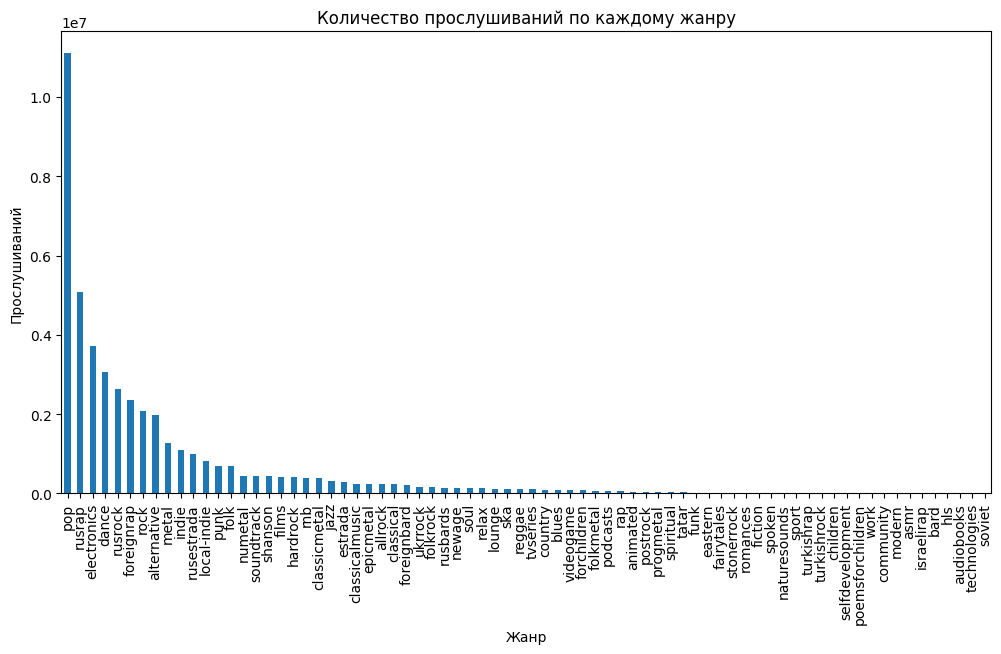

In [35]:
# Количество прослушиваний по каждому жанру

events.groupby('genre')['track'].count().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.xlabel("Жанр")
plt.ylabel("Прослушиваний")
plt.title("Количество прослушиваний по каждому жанру")

Pop на то и pop!

Text(0.5, 1.0, 'Количество прослушиваний по месяцам')

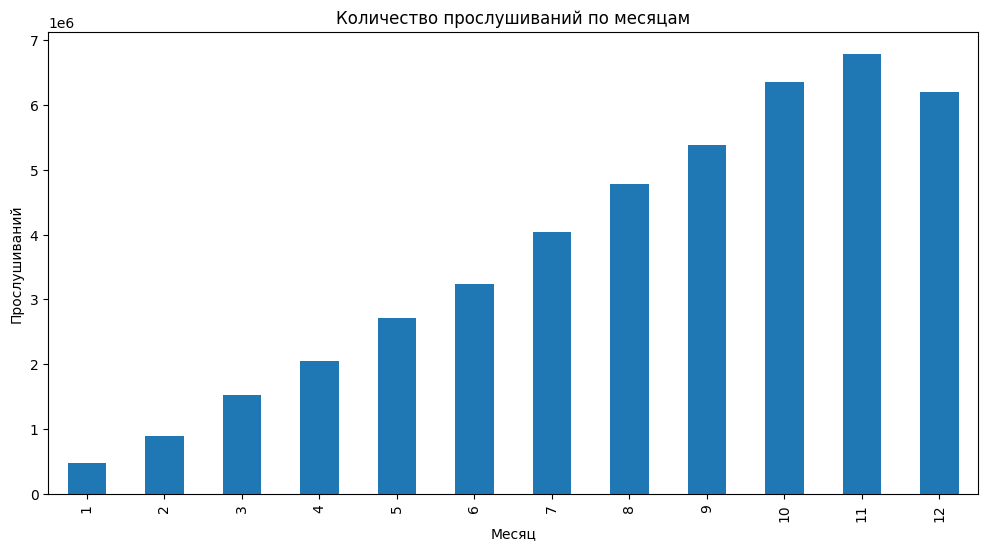

In [36]:
# Количество прослушиваний по месецам жанру

# создаем поле с месяцами, месяц берем из started_at
events['month'] = events['started_at'].dt.month

events.groupby('month')['track'].count().plot(kind='bar', figsize=(12, 6))

plt.xlabel("Месяц")
plt.ylabel("Прослушиваний")
plt.title("Количество прослушиваний по месяцам")


В январе вообше не до музыки, понимаю. Летом такое себе, а вот ноябре!

Наиболее популярные треки

In [37]:
# Топ-10 треков встречаемых в истории прослушивания

events.track_id.value_counts().head(10).reset_index().merge(items[['track_id', 'track', 'artist', 'genre']], on='track_id', how='left')

,track_id,count,track,artist,genre
0,53404,22082,Smells Like Teen Spirit,Nirvana,alternative
1,33311009,21294,Believer,Imagine Dragons,rock
2,178529,20225,Numb,Linkin Park,numetal
3,35505245,19934,I Got Love,Miyagi & Эндшпиль,rusrap
4,24692821,17379,Way Down We Go,KALEO,indie
5,32947997,17261,Shape of You,Ed Sheeran,pop
6,65851540,17249,Юность,Dabro,pop
7,51241318,17026,In The End,Tommee Profitt,rnb
8,60292250,17024,Blinding Lights,The Weeknd,rnb
9,45499814,17016,Life,Zivert,pop


Вот как так, самый прослушиваемый трек Smell Like ... а самый прослушиваемый жанр pop!?

Наиболее популярные жанры

In [38]:
# Топ-10 самых популярных жанров

events.genre.value_counts().head(10)

genre
pop            11095957
rusrap          5069490
electronics     3715404
dance           3064344
rusrock         2636764
foreignrap      2367730
rock            2071196
alternative     1986663
metal           1276190
indie           1091620
Name: count, dtype: int64

Треки, которые никто не прослушал

In [39]:
# Создаем список значений track_id которые есть в items но нет в events
no_in_events = list(set(items.track_id.values.tolist()) - set(events.track_id.values.tolist()))

items[items.track_id.isin(no_in_events)].head(10)

,track_id,track,album,artist,genre
4,38,Momma's Boy,Taller Children,Elizabeth & the Catapult,pop
149,321,Back To New Orleans,Blues Six Pack,"Sam ""Lightnin'"" Hopkins",blues
1500,633,Just Friends,The Real Thing,Vanessa Williams,pop
2604,1006,Sheila,Picturesque Matchstickable Messages From The S...,Status Quo,rock
2616,1008,Gentleman Joe's Sidewalk Cafe,Picturesque Matchstickable Messages From The S...,Status Quo,rock
4090,1085,Welcome To England,Abnormally Attracted To Sin,Tori Amos,rock
5248,1108,Someday We'll Be Together,Motown Love,The Supremes,pop
5378,1112,You Really Got A Hold On Me,Motown Love,The Miracles,rnb
6081,1136,Your Kiss Is Sweet,Motown Love,Syreeta,soul
6694,1160,Love Machine,Motown Love,The Miracles,pop


# Преобразование данных

Преобразуем данные в формат, более пригодный для дальнейшего использования в расчётах рекомендаций.

In [40]:
# По анологии со спринтом подготовим данные для рекомендательной системы

# Перестрим индексы items
items = items.reset_index(drop=True)
 
# Закодируем track_id для этого обучим энкодер
i_encoder = LabelEncoder()
i_encoder.fit(items['track_id'])

# Добавим закодированное поле в items
items['track_id_enc'] = i_encoder.transform(items['track_id'])

items.head()

,track_id,track,album,artist,genre,track_id_enc
0,26,Complimentary Me,Taller Children,Elizabeth & the Catapult,pop,0
1,38,Momma's Boy,Taller Children,Elizabeth & the Catapult,pop,1
2,135,Atticus,Wild Young Hearts,Noisettes,pop,2
3,136,24 Hours,Wild Young Hearts,Noisettes,pop,3
4,138,Don't Upset The Rhythm (Go Baby Go),Wild Young Hearts,Noisettes,pop,4


In [41]:
# По анологии поступим и с events

events = events.reset_index(drop=True)

# Закодируем user_id и track_id (для track_id энкодер уже обучен)
u_encoder = LabelEncoder()
u_encoder.fit(events['user_id'])

# Добавляем закодированные поля в events
events['user_id_enc'] = u_encoder.transform(events['user_id'])
events['track_id_enc'] = i_encoder.transform(events['track_id'])
events.head()


,user_id,track_id,started_at,track,genre,month,user_id_enc,track_id_enc
0,1,24417,2022-06-11,Du Riechst So Gut,metal,6,0,4345
1,1,108208,2022-06-13,Я не знаю,punk,6,0,18060
2,1,108209,2022-06-13,Измена,punk,6,0,18061
3,1,592642,2022-06-15,Улица роз,classicmetal,6,0,61771
4,1,628687,2022-06-15,Holding Out for a Hero,pop,6,0,64517


In [42]:
# Так-же для построения рекомендательной системы нам понадобиться некий рейтинг треков
# Построим его на основании истроии прослушиваний треков в events и нормализуем по отнашению к самому популярному треку
# т.е. самый популярный будет с рейтингом 1, непрослушанные с рейтингом 0

track_rating = events.groupby('track_id_enc')['user_id'].count()
track_rating = track_rating / track_rating.max()
track_rating = track_rating.reset_index()

track_rating.head()

,track_id_enc,user_id
0,0,0.000045
1,2,0.000226
2,3,0.000136
3,4,0.000045
4,5,0.000045


In [43]:
# Переименуем поле user_id

track_rating = track_rating.rename(columns= {'user_id': 'tracks_rating'})

# И обьеденим с events

events = events.merge(track_rating, on='track_id_enc', how='left')
events.head()

,user_id,track_id,started_at,track,genre,month,user_id_enc,track_id_enc,tracks_rating
0,1,24417,2022-06-11,Du Riechst So Gut,metal,6,0,4345,0.074404
1,1,108208,2022-06-13,Я не знаю,punk,6,0,18060,0.000996
2,1,108209,2022-06-13,Измена,punk,6,0,18061,0.002355
3,1,592642,2022-06-15,Улица роз,classicmetal,6,0,61771,0.006114
4,1,628687,2022-06-15,Holding Out for a Hero,pop,6,0,64517,0.079024


In [44]:
# Удаляем лишнее
events = events.drop(columns=['track', 'genre', 'month'])
events.head()

,user_id,track_id,started_at,user_id_enc,track_id_enc,tracks_rating
0,1,24417,2022-06-11,0,4345,0.074404
1,1,108208,2022-06-13,0,18060,0.000996
2,1,108209,2022-06-13,0,18061,0.002355
3,1,592642,2022-06-15,0,61771,0.006114
4,1,628687,2022-06-15,0,64517,0.079024


In [45]:
# Сохраняем оба энкодера для дальнейшей экономии времени и ресурсов

with open('item_encoder.pkl', 'wb') as enc_i:
	joblib.dump(i_encoder, enc_i)
	
with open('user_encoder.pkl', 'wb') as enc_u:
	joblib.dump(u_encoder, enc_u)

# Сохранение данных

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.

In [46]:
items.to_parquet('items.parquet')
events.to_parquet('events.parquet')

# Очистка памяти

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже. 

Приведите соответствующие код, комментарии, например:
- код для удаление более ненужных переменных,
- комментарий, что следует перезапустить kernel, выполнить такие-то начальные секции и продолжить с этапа 3.

In [46]:
# Перегружаем кернел нотебука и продолжаем, я импорты повторил ниже

# === ЭТАП 3 ===

# Загрузка данных

Если необходимо, то загружаем items.parquet, events.parquet.

In [1]:
# Импотры тут что-бы не мотать ноутбук

import pandas as pd
import numpy as np
import random
import scipy
import joblib

import matplotlib.pyplot as plt
from implicit.als import AlternatingLeastSquares
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier, Pool


RANDOM_STATE = 42

np.random.seed(RANDOM_STATE) 

/home/mle-user/env_recsys_start_s4/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Загружаем все что насохраняли

items = pd.read_parquet('items.parquet')
events = pd.read_parquet('events.parquet')

with open('item_encoder.pkl', 'rb') as enc_i:
	i_encoder = joblib.load(enc_i)

with open('user_encoder.pkl', 'rb') as enc_u:
	u_encoder = joblib.load(enc_u)

# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.

In [3]:
# Делим выборку на train и test
# По условиям задачи "...в тренировочную отнесите все данные до 16 декабря 2022 года..."

split_date = pd.to_datetime("2022-12-16")
split_idx = events['started_at'] < split_date

events_train = events[split_idx].copy()
events_test = events[~split_idx].copy()

print(f"Набор events_train: {events_train.shape}")
print(f"Набор events_test: {events_test.shape}")

Набор events_train: (41705074, 6)
Набор events_test: (2768958, 6)


In [4]:
# Количество пользователей в тренировочной и тестовой выборке
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()

# Пользователи представленные в обеих выборках
common_users = set(users_train).intersection(set(users_test))

# Пользователи представленные только в тестовой выборке
cold_users = users_test[~users_test.isin(common_users)]

print(f"Пользователей train: {len(users_train)}")
print(f"Пользователей test: {len(users_test)}")
print(f"Пользователи представленные в обеих выборках: {len(common_users)}")
print(f"Пользователи представленные только в тестовой выборке: {len(cold_users)}")

Пользователей train: 268466
Пользователей test: 156922
Пользователи представленные в обеих выборках: 150744
Пользователи представленные только в тестовой выборке: 6178


# Топ популярных

Рассчитаем рекомендации как топ популярных.

In [10]:
# Топ-100 популярных

top_popular = events_train.track_id.value_counts().head(100)
top_popular = top_popular.reset_index()
top_popular = top_popular.merge(items[['track_id', 'track', 'album',  'artist']], on='track_id', how='left')
top_popular['track_id_enc'] = i_encoder.transform(top_popular['track_id'])
top_popular = top_popular.rename(columns= {'count': 'tracks_rating'})

top_popular.head()

,track_id,tracks_rating,track,album,artist,track_id_enc
0,53404,21891,Smells Like Teen Spirit,Nevermind,Nirvana,9098
1,33311009,20192,Believer,Shape Of Pop,Imagine Dragons,483876
2,178529,20026,Numb,Meteora,Linkin Park,26665
3,35505245,19139,I Got Love,I Got Love,Miyagi & Эндшпиль,512157
4,24692821,16966,Way Down We Go,Way down We Go,KALEO,368072


In [11]:
# Сохраняем в файл

top_popular.to_parquet('top_popular.parquet')

# Персональные

Рассчитаем персональные рекомендации.

In [7]:
# Для определения песональных рекомендаций по заданию необходимо использовать ALS модель
# для нее необходимо создать user-item матрицу, с осями user_id_enc, track_id_enc и значениями tracks_rating

ui_matrix_train = scipy.sparse.csr_matrix(
		(
		events_train['tracks_rating'],
		(events_train['user_id_enc'], events_train['track_id_enc'])
		), 
		dtype=np.int8
	)

ui_matrix_train

<Compressed Sparse Row sparse matrix of dtype 'int8'
	with 41661709 stored elements and shape (274644, 1000000)>

In [8]:
# Тренируем ALS

als_model = AlternatingLeastSquares(
	factors = 50,
	iterations = 50,
	regularization = 0.5,
	random_state = RANDOM_STATE
	)

als_model.fit(ui_matrix_train)

/home/mle-user/env_recsys_start_s4/lib/python3.10/site-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 4 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()
100%|██████████| 50/50 [04:10<00:00,  5.01s/it]


In [9]:
# Теперь можем сгенерировать рекомендации для каждого пользователя

user_id_enc = range(len(u_encoder.classes_))

personal_als = als_model.recommend(
	user_id_enc,
	ui_matrix_train[user_id_enc],
	filter_already_liked_items=False,
	N=10								# Количество рекомендаций на каждого пользователя
	)

In [10]:
# Собираем итоговый датафрейм с рекомендациями

track_ids_enc = personal_als[0]
als_score = personal_als[1]

personal_als = pd.DataFrame({
	'user_id_enc': user_id_enc,
	'track_id_enc': track_ids_enc.tolist(),
	'score': als_score.tolist()
})

In [11]:
personal_als

,user_id_enc,track_id_enc,score
0,0,"[9098, 126601, 265629, 15636, 377703, 696106, ...","[2.770947533925483e-13, 6.807570476002072e-23,..."
1,1,"[9098, 504691, 83145, 58616, 427412, 92014, 26...","[3.540543509414351e-12, 1.2764221306002482e-22..."
2,2,"[265629, 27812, 23039, 39466, 394794, 60200, 6...","[3.4989979093619534e-23, 2.1696775116935343e-2..."
3,3,"[112845, 330585, 27812, 169233, 6366, 427048, ...","[1.2621135821747322e-22, 8.151485273733623e-23..."
4,4,"[15636, 504691, 4018, 126601, 34954, 1966, 586...","[5.5377335432461645e-25, 4.752791304571838e-25..."
...,...,...,...
274639,274639,"[9098, 58616, 1536, 27812, 15643, 169233, 5682...","[3.1415866544488857e-13, 3.4204595487268736e-2..."
274640,274640,"[504691, 427412, 23039, 121690, 265629, 3448, ...","[7.854813462169545e-24, 7.720001866632705e-24,..."
274641,274641,"[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
274642,274642,"[696106, 209500, 699153, 377703, 90461, 330585...","[6.094478714094452e-23, 4.304484531477041e-23,..."


In [12]:
# т.к. в track_id_enc и score у нас щас list разворачиваем их
personal_als = personal_als.explode(["track_id_enc", "score"], ignore_index=True)

# Исправляем типы данных
personal_als['track_id_enc'] = personal_als['track_id_enc'].astype('int')
personal_als['score'] = personal_als['score'].astype('float')

# декодируем id в новые поля
personal_als['user_id'] = u_encoder.inverse_transform(personal_als['user_id_enc'])
personal_als['track_id'] = i_encoder.inverse_transform(personal_als['track_id_enc'])

# удаляем уже ненужные поля
personal_als = personal_als.drop(columns=['user_id_enc', 'track_id_enc'])

personal_als = personal_als[['user_id', 'track_id', 'score']]
personal_als

,user_id,track_id,score
0,4,53404,2.770948e-13
1,4,2280250,6.807570e-23
2,4,16549426,5.593083e-23
3,4,96079,4.955009e-23
4,4,25427084,4.884205e-23
...,...,...,...
2746435,1374582,29611476,8.710325e-24
2746436,1374582,23559960,8.408570e-24
2746437,1374582,96079,8.009687e-24
2746438,1374582,4427406,7.241026e-24


In [13]:
# Визуально посмотрим как рекомендации соответствуют истории последних прослушиваний пользователя
user_id = events_train['user_id'].sample().iat[0]

print(f"Пользователь с user_id: {user_id}")

print("История (10 последних событий)")
user_history = events_train.query("user_id == @user_id").merge(items[['track_id', 'track', 'artist', 'album', 'genre']], on="track_id", how='left')


# Берем последние 10 событий
user_history_to_print = user_history[['user_id', 'track_id', 'track', 'artist', 'album', 'genre']].tail(10)
display(user_history_to_print)

print("Рекомендации")
user_recs = personal_als.query("user_id == @user_id")
user_recs = user_recs.merge(items, on="track_id", how="left").drop(["score", "track_id_enc"], axis=1)

print(f"Рекомендации для пользователя с 'user_id={user_id}'")
display(user_recs)

Пользователь с user_id: 441150
История (10 последних событий)


,user_id,track_id,track,artist,album,genre
340,441150,70110700,Бойцовский клуб,LOUNA,The Best Of,numetal
341,441150,70110746,Мама,LOUNA,The Best Of,numetal
342,441150,71239584,Дед Агван (Стих),Игорь Растеряев,Дождь над Медведицей,rusbards
343,441150,75099809,Колхозный панк,Голос Омерики,Трибьют Сектор Газа,rusrock
344,441150,75099811,Ночь перед Рождеством,ДДТ,Трибьют Сектор Газа,rusrock
345,441150,75732979,Наступает ночь,Мираж,Снова вмeстe,rusestrada
346,441150,79986424,Всё идёт по плану,Александр Пушной,Каверы Пушного,rusrock
347,441150,81848875,Федерико Феллини,Galibri & Mavik,Федерико Феллини,pop
348,441150,82783144,На часах ноль-ноль,Dabro,На часах ноль-ноль,pop
349,441150,84245339,Бухгалтер,Комбинация,Московская прописка,rusestrada


Рекомендации
Рекомендации для пользователя с 'user_id=441150'


,user_id,track_id,track,album,artist,genre
0,441150,53404,Smells Like Teen Spirit,Nevermind,Nirvana,alternative
1,441150,34084451,Моё сердце,25-й кадр,Сплин,rusrock
2,441150,53412,Come As You Are,Nevermind,Nirvana,alternative
3,441150,16549426,Happy,"Happy (From ""Despicable Me 2"")",Pharrell Williams,pop
4,441150,580880,Мой рок-н-ролл,Мяу кисс ми,Би-2,rusrock
5,441150,1710811,We Will Rock You,Greatest Hits,Queen,rock
6,441150,234701,U Can't Touch This,Hip To The Hop: 30th Anniversary Of Hip Hop Hi...,MC Hammer,films
7,441150,732388,ариведерчи,земфира,Земфира,rusrock
8,441150,560468,Варвара,Би-2,Би-2,rusrock
9,441150,133049,Dani California,Dani California,Red Hot Chili Peppers,rock


In [14]:
# Сохраняем персональные рекомендации
personal_als.to_parquet('personal_als.parquet')

# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

In [57]:
# Получим энкодированные идентификаторы всех объектов, известных нам из events_train
train_track_ids_enc = events_train['track_id_enc'].unique()[:100000] # пришлось ограничить, иначе время расчета просто космос! 

# Искать будем 10 похожих
max_similar_tracks = 10

# получаем списки похожих объектов, используя ранее полученную ALS-модель
similar_items = als_model.similar_items(train_track_ids_enc, N=max_similar_tracks+1) # Берем max_similar_tracks+1 т.к. трек будет похож сам на себя и это мы в дальнейшем учтем

# преобразуем полученные списки в табличный формат
sim_item_track_ids_enc = similar_items[0]
sim_item_scores = similar_items[1]

similar_items = pd.DataFrame({
    "track_id_enc": train_track_ids_enc,
    "sim_track_id_enc": sim_item_track_ids_enc.tolist(), 
    "score": sim_item_scores.tolist()}) 

similar_items = similar_items.explode(["sim_track_id_enc", "score"], ignore_index=True) 

# приводим типы данных
similar_items["sim_track_id_enc"] = similar_items["sim_track_id_enc"].astype("int")
similar_items["score"] = similar_items["score"].astype("float")

# получаем изначальные идентификаторы
similar_items["track_id_1"] = i_encoder.inverse_transform(similar_items["track_id_enc"])
similar_items["track_id_2"] = i_encoder.inverse_transform(similar_items["sim_track_id_enc"])
similar_items = similar_items.drop(columns=["track_id_enc", "sim_track_id_enc"])

# убираем пары с одинаковыми объектами
similar_items = similar_items.query("track_id_1 != track_id_2")

In [58]:
similar_items

,score,track_id_1,track_id_2
1,0.788444,6006252,51400669
2,0.783083,6006252,17197809
3,0.761927,6006252,48209004
4,0.726467,6006252,26181484
5,0.722688,6006252,81283043
...,...,...,...
1099995,0.724887,17189030,66408725
1099996,0.724290,17189030,32551797
1099997,0.722380,17189030,35512
1099998,0.720460,17189030,2431940


In [59]:
similar_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 1 to 1099999
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   score       1000000 non-null  float64
 1   track_id_1  1000000 non-null  int64  
 2   track_id_2  1000000 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 30.5 MB


In [62]:
# Проверим как работает 
# Очень жаль что пришлось ограничить количество треков для которых подбираются похожие!
# Придется покликать ячейку что-бы найти просчитанные варианты!

track_id_rnd = events_train['track_id'].sample().iat[0]
track_rnd = items.query("track_id == @track_id_rnd")
display(track_rnd)

k_similar = similar_items.query("track_id_1 == @track_id_rnd").merge(items, left_on='track_id_2', right_on='track_id')
display(k_similar)

,track_id,track,album,artist,genre,track_id_enc
749869,56920236,Безболезненно,Vinyl #1,Zivert,pop,749869


,score,track_id_1,track_id_2,track_id,track,album,artist,genre,track_id_enc
0,0.797860,56920236,31518176,31518176,NO PARTY,NO PARTY,BOOGIE BITCHES,electronics,451488
1,0.784804,56920236,50585688,50585688,Как твои дела?,Магнит,Юлия Савичева,pop,689623
2,0.766231,56920236,24442538,24442538,Как на войне,Позорная звезда,Агата Кристи,rusrock,364746
3,0.753279,56920236,20723130,20723130,Changing,Changing,Sigma,dance,319861
4,0.750910,56920236,58959898,58959898,Run for Your Life,The Book of Fire,Mono Inc.,rock,766978
5,0.750732,56920236,35040673,35040673,Loco,Loco,Tolebi,foreignrap,505633
6,0.747871,56920236,51152118,51152118,Я тебя люблю,Блажь,Николай Носков,rusrock,695203
7,0.746799,56920236,18539252,18539252,"Тук, тук, тук",Чита Дрита,Верка Сердючка,estrada,291000
8,0.744207,56920236,2750810,2750810,School,Nevermind,Nirvana,alternative,137503
9,0.743149,56920236,2199165,2199165,Arlandria,Wasting Light,Foo Fighters,alternative,122730


In [63]:
similar_items.to_parquet("similar.parquet")

# Построение признаков

Построим три признака, можно больше, для ранжирующей модели.

In [29]:
# Перед построением признаков сначала определимся с кандидатами
# Для этого используем events_test и разделим на данные для тренировки где мы определим таргеты и тренировочные данные
# По заданию мы уже делили разбиение по отметке 16 декабря 2022
# сейчас возьму дату на 10 дней позже 26.12.2022

split_date_for_labels = pd.to_datetime('2022-12-26')
split_date_for_labels_idx = events_test['started_at'] < split_date_for_labels
events_label = events_test[split_date_for_labels_idx].copy()	# Данные до указанной даты будем маркировать
events_test_2 = events_test[~split_date_for_labels_idx].copy()

In [ ]:
# Checkpoint
# personal_als = pd.read_parquet('personal_als.parquet')

In [8]:
# В качестве кандидатов возмем уже подготовленные данные personal_als.parquet

# Создаем поле target в событиях только прослушанные треки, ставим таргет 1
events_label['target'] = 1

# Добавляем target к рекомендациям
candidates = personal_als.merge(
	events_label[['user_id', 'track_id', 'target']], 
	on=['user_id', 'track_id'],
	how='left'
)

In [41]:
# Неопределенные таргеты определяем нулями
candidates['target'] = candidates['target'].fillna(0).astype(int)

# Избегаем ситуации когда у пользователя все таргеты 0
candidates = candidates.groupby('user_id').filter(lambda x: x['target'].sum() > 0)

# Сейчас у нас дисбаланс классов, т.к. пользователи прослушали далеко не весь список треков
# Поэтому каждого пользователя оставим один положительный пример и 4 отрицательных

candidates_for_train = pd.concat([
	candidates.query("target == 1"),
	candidates.query("target == 0").groupby('user_id').apply(lambda x: x.sample(4, random_state=RANDOM_STATE))
	])
	
candidates_for_train = candidates_for_train.reset_index(drop=True)

candidates_for_train.head()

,user_id,track_id,score,target
0,215,28036311,3.062896e-24,1
1,951,51516485,4.255431e-23,1
2,1148,214489,4.368345e-23,1
3,3198,51241318,1.746437e-23,1
4,4005,39089632,2.819435e-23,1


In [42]:
candidates_for_train.target.value_counts()

target
0    4856
1    1271
Name: count, dtype: int64

In [43]:
# Добавим жанр в качестве признака
candidates_for_train = candidates_for_train.merge(items[['track_id', 'genre']], on='track_id', how='left')

In [44]:
candidates_for_train.isna().sum()

user_id     0
track_id    0
score       0
target      0
genre       7
dtype: int64

In [23]:
# Посчитаем признак доля каждого жанра в датасете, нормализуем.

genre_share = events_train.merge(
	items[['track_id', 'genre']],
	on='track_id',
	how='left'
	).groupby('genre')['track_id'].count()
	
genre_share = genre_share / genre_share.sum()
genre_share = genre_share.reset_index().rename(columns={'track_id': 'genre_share'})

genre_share.sort_values(by='genre_share', ascending=False)

,genre,genre_share
42,pop,2.467582e-01
54,rusrap,1.113980e-01
15,electronics,8.409386e-02
13,dance,6.817529e-02
55,rusrock,5.999524e-02
...,...,...
5,bard,2.906488e-06
29,hls,2.402056e-06
4,audiobooks,1.032884e-06
67,technologies,3.603084e-07


In [45]:
# Добавим новый признак
candidates_for_train = candidates_for_train.merge(genre_share, on='genre', how='left')

In [46]:
candidates_for_train

,user_id,track_id,score,target,genre,genre_share
0,215,28036311,3.062896e-24,1,hardrock,0.009624
1,951,51516485,4.255431e-23,1,indie,0.024907
2,1148,214489,4.368345e-23,1,rock,0.047494
3,3198,51241318,1.746437e-23,1,rnb,0.008801
4,4005,39089632,2.819435e-23,1,rusrock,0.059995
...,...,...,...,...,...,...
6122,1371839,52100,7.401475e-23,0,pop,0.246758
6123,1374153,41625041,7.508522e-24,0,rock,0.047494
6124,1374153,1710816,1.585841e-23,0,rock,0.047494
6125,1374153,39257277,1.019742e-23,0,dance,0.068175


In [47]:
# Генерируем дополнительные признаки
def get_user_features(events):
    user_features = events.groupby("user_id").agg(
        listen_month=("started_at", lambda x: (x.max()-x.min()).days/30.5),
        tracks_listened=("track_id", "count"),
        rating_avg=("tracks_rating", "mean"),
        rating_std=("tracks_rating", "std"))
    
    user_features["tracks_per_month"] = user_features["tracks_listened"] / user_features["listen_month"]
    
    return user_features

user_features_for_train = get_user_features(events_train)
candidates_for_train = candidates_for_train.merge(user_features_for_train, on="user_id", how="left")

# Что получилось
candidates_for_train.head()

,user_id,track_id,score,target,genre,genre_share,listen_month,tracks_listened,rating_avg,rating_std,tracks_per_month
0,215,28036311,3.062896e-24,1,hardrock,0.009624,2.754098,134,0.088345,0.119692,48.654762
1,951,51516485,4.255431e-23,1,indie,0.024907,0.557377,29,0.124245,0.177250,52.029412
2,1148,214489,4.368345e-23,1,rock,0.047494,0.065574,2,0.169581,0.023080,30.500000
3,3198,51241318,1.746437e-23,1,rnb,0.008801,2.557377,173,0.015806,0.033291,67.647436
4,4005,39089632,2.819435e-23,1,rusrock,0.059995,2.000000,490,0.049142,0.093565,245.000000


In [38]:
# Сохраним
candidates_for_train.to_parquet('candidates_for_train.parquet')

In [ ]:
# Checkpoint
# candidates_for_train = pd.read_parquet('candidates_for_train.parquet')

In [30]:
# К нам поступили "новые" данные!
events_inference = pd.concat([events_train, events_label])

# Создаем User-Item матрицу для обучения ALS на новых данныех
user_item_matrix_train_new = scipy.sparse.csr_matrix(
    (
    events_inference["tracks_rating"],
    (events_inference["user_id_enc"], events_inference["track_id_enc"])
    ),
    dtype=np.int8
)

user_item_matrix_train_new

<Compressed Sparse Row sparse matrix of dtype 'int8'
	with 43736775 stored elements and shape (274644, 1000000)>

In [27]:
# Тренеруем ALS

als_model_inference  = AlternatingLeastSquares(
	factors = 50,
	iterations = 50,
	regularization = 0.5,
	random_state = RANDOM_STATE
	)

als_model_inference .fit(user_item_matrix_train_new)

100%|██████████| 50/50 [04:16<00:00,  5.13s/it]


In [28]:
# Модель рекомендует!
user_ids_enc = range(events_inference['user_id_enc'].max())

als_recommendations_new = als_model_inference.recommend(
    user_ids_enc, 
    user_item_matrix_train_new[user_ids_enc], 
    filter_already_liked_items=False, 
    N=10
)

In [29]:
# Преобразуем результат в датафрейм как уже делали
track_ids_enc = als_recommendations_new[0]
als_scores = als_recommendations_new[1]

als_recommendations_new = pd.DataFrame({
    "user_id_enc": user_ids_enc,
    "track_id_enc": track_ids_enc.tolist(), 
    "score": als_scores.tolist()})

als_recommendations_new = als_recommendations_new.explode(["track_id_enc", "score"], ignore_index=True)

# Приводим типы данных
als_recommendations_new["track_id_enc"] = als_recommendations_new["track_id_enc"].astype("int")
als_recommendations_new["score"] = als_recommendations_new["score"].astype("float")

# Получаем изначальные идентификаторы
als_recommendations_new["user_id"] = u_encoder.inverse_transform(als_recommendations_new["user_id_enc"])
als_recommendations_new["track_id"] = i_encoder.inverse_transform(als_recommendations_new["track_id_enc"])
als_recommendations_new = als_recommendations_new.drop(columns=["user_id_enc", "track_id_enc"])


als_recommendations_new = als_recommendations_new[["user_id", "track_id", "score"]]

In [30]:
# Что получилось?
als_recommendations_new.head()

,user_id,track_id,score
0,4,53404,2.332031e-13
1,4,39089632,1.979030e-23
2,4,16549426,1.787266e-23
3,4,38646012,1.553616e-23
4,4,628970,1.519852e-23


In [31]:
# Сохраняем
als_recommendations_new.to_parquet("personal_als_inf.parquet")

In [ ]:
# Checkpoint
# als_recommendations_new = pd.read_parquet("personal_als_inf.parquet")

In [50]:
# оставим только тех пользователей, что есть в тесте, для экономии ресурсов
candidates_to_rank = als_recommendations_new[als_recommendations_new["user_id"].isin(events_test_2["user_id"].drop_duplicates())]
candidates_to_rank.head()

,user_id,track_id,score
0,4,53404,2.332031e-13
1,4,39089632,1.979030e-23
2,4,16549426,1.787266e-23
3,4,38646012,1.553616e-23
4,4,628970,1.519852e-23


In [51]:
# добавляем те-же признаки что добавляли в candidates_for_train, теперь в candidates_to_rank
candidates_to_rank = candidates_to_rank.merge(items[["track_id", "genre"]], on="track_id", how="left")
candidates_to_rank = candidates_to_rank.merge(genre_share, on="genre", how="left")

candidates_to_rank.head()

,user_id,track_id,score,genre,genre_share
0,4,53404,2.332031e-13,alternative,0.045291
1,4,39089632,1.979030e-23,rusrock,0.059995
2,4,16549426,1.787266e-23,pop,0.246758
3,4,38646012,1.553616e-23,allrock,0.005401
4,4,628970,1.519852e-23,alternative,0.045291


In [ ]:
user_features_for_ranking = get_user_features(events_inference)
candidates_to_rank = candidates_to_rank.merge(user_features_for_ranking, on="user_id", how="left")

In [50]:
# Сохраним 
candidates_to_rank.to_parquet('candidates_to_rank.parquet')

In [53]:
candidates_to_rank = pd.read_parquet('candidates_to_rank.parquet')

In [ ]:
# Откуда выплыло 7 isna() в genre!!! CatBoost падал
candidates_for_train = candidates_for_train[~candidates_for_train.genre.isna()]

In [59]:
candidates_for_train.isna().sum()

user_id             0
track_id            0
score               0
target              0
genre               0
genre_share         0
listen_month        0
tracks_listened     0
rating_avg          0
rating_std          0
tracks_per_month    0
dtype: int64

# Ранжирование рекомендаций

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

In [60]:
# Задаём имена колонок признаков и таргета
features = ["score", "genre", "genre_share", 
            'listen_month','tracks_listened',
            'rating_avg','rating_std','tracks_per_month']
cat_features = ["genre"]
target = ["target"]

# создаём Pool
train_data = Pool(
    data=candidates_for_train[features],
    label=candidates_for_train[target],
    cat_features=cat_features,
)

# Инициализируем модель CatBoostClassifier
cb_model = CatBoostClassifier(iterations=1000,
                           learning_rate=0.1,
                           depth=6,
                           loss_function='Logloss',
                           verbose=100,
                           random_seed=RANDOM_STATE)

# тренируем модель
cb_model.fit(train_data)

0:	learn: 0.6327806	total: 55.8ms	remaining: 55.8s
100:	learn: 0.3564605	total: 494ms	remaining: 4.39s
200:	learn: 0.3119843	total: 951ms	remaining: 3.78s
300:	learn: 0.2807792	total: 1.41s	remaining: 3.27s
400:	learn: 0.2552306	total: 1.87s	remaining: 2.79s
500:	learn: 0.2333092	total: 2.33s	remaining: 2.32s
600:	learn: 0.2149202	total: 2.79s	remaining: 1.85s
700:	learn: 0.1975998	total: 3.5s	remaining: 1.5s
800:	learn: 0.1821608	total: 4.19s	remaining: 1.04s
900:	learn: 0.1674268	total: 4.67s	remaining: 513ms
999:	learn: 0.1555668	total: 5.13s	remaining: 0us


In [63]:
# Можно использовать модель для ранжирования (candidates_to_rank)

inference_data = Pool(data=candidates_to_rank[features], cat_features=cat_features)
predictions = cb_model.predict_proba(inference_data)
candidates_to_rank["cb_score"] = predictions[:, 1]

# Сортируем датафрейм для построения ранжирования
candidates_to_rank = candidates_to_rank.sort_values(["user_id", "cb_score"], ascending=[True, False])

# Ранжируем рекомендации
candidates_to_rank["rank"] = candidates_to_rank.groupby("user_id").cumcount() + 1

candidates_to_rank.head()

,user_id,track_id,score,genre,genre_share,listen_month,tracks_listened,rating_avg,rating_std,tracks_per_month,cb_score,rank
5,4,51516485,1.462689e-23,indie,0.024907,8.819672,250.0,0.035735,0.066012,28.345725,0.857836,1
7,4,2758009,1.399440e-23,rock,0.047494,8.819672,250.0,0.035735,0.066012,28.345725,0.281300,2
8,4,9769,1.211581e-23,rock,0.047494,8.819672,250.0,0.035735,0.066012,28.345725,0.148976,3
1,4,39089632,1.979030e-23,rusrock,0.059995,8.819672,250.0,0.035735,0.066012,28.345725,0.135899,4
9,4,560468,9.702608e-24,rusrock,0.059995,8.819672,250.0,0.035735,0.066012,28.345725,0.128306,5


In [64]:
# Сохраним рекомендации
candidates_to_rank.to_parquet("recommendations.parquet")

# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

In [12]:
# Загрузим рекомендации
top_popular = pd.read_parquet('top_popular.parquet')


Топ популярных

In [15]:
# Наиболее популярные

# Сколько из рекомендаций наиболее популярных треков было в events cold_users

events_cold = events[events.user_id.isin(cold_users)].drop('tracks_rating', axis=1)

events_cold_top = events_cold.merge(
    top_popular[['track_id', 'tracks_rating']],
    on='track_id',
    how="left",
)
events_cold_top.head()

,user_id,track_id,started_at,user_id_enc,track_id_enc,tracks_rating
0,83,1660785,2022-12-26,14,109818,NaN
1,83,15496134,2022-12-26,14,250928,NaN
2,83,28523442,2022-12-26,14,415575,NaN
3,83,43855816,2022-12-26,14,629315,NaN
4,83,44484514,2022-12-26,14,637232,NaN


In [16]:
top_listened_share = events_cold_top.groupby("user_id")["tracks_rating"].apply(lambda x: x.notnull().mean())
recall_top = top_listened_share.mean()
print(f"Recall для топ популярных треков: {recall_top}")

Recall для топ популярных треков: 0.0588179917286623


Персональные, полученные при помощи ALS

In [17]:
# Персональные рекомендации ALS

als_recommendations = pd.read_parquet('personal_als.parquet')

In [19]:
def process_events_recs_for_binary_metrics(events_train, events_test, recs, top_k=None):

    """
    Размечает пары <user_id, item_id> для общего множества пользователей признаками
    - gt (ground truth)
    - pr (prediction)
    top_k: расчёт ведётся только для top k-рекомендаций
    """
    
    events_test["gt"] = True
    common_users = set(events_test["user_id"]) & set(recs["user_id"])

    print(f"Common users: {len(common_users)}")
    
    events_for_common_users = events_test[events_test["user_id"].isin(common_users)].copy()
    recs_for_common_users = recs[recs["user_id"].isin(common_users)].copy()

    recs_for_common_users = recs_for_common_users.sort_values(["user_id", "score"], ascending=[True, False])

    events_for_common_users = events_for_common_users[events_for_common_users["track_id"].isin(
        events_train["track_id"].unique()
    )
    ]

    if top_k is not None:
        recs_for_common_users = recs_for_common_users.groupby("user_id").head(top_k)
    
    events_recs_common = events_for_common_users[["user_id", "track_id", "gt"]].merge(
        recs_for_common_users[["user_id", "track_id", "score"]], 
        on=["user_id", "track_id"], 
        how="outer",
    )    

    events_recs_common["gt"] = events_recs_common["gt"].fillna(False)
    events_recs_common["pr"] = ~events_recs_common["score"].isnull()
    
    events_recs_common["tp"] = events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fp"] = ~events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fn"] = events_recs_common["gt"] & ~events_recs_common["pr"]

    return events_recs_common

In [20]:
events_recs_for_binary_metrics = process_events_recs_for_binary_metrics(
    events_train,
    events_test, 
    als_recommendations, 
    top_k=5)	# Не забываем про топ=5

Common users: 31443


In [22]:
def compute_cls_metrics(events_recs_for_binary_metric):
    
    """Расчет precision и recall"""
    
    groupper = events_recs_for_binary_metric.groupby("user_id")

    # Computing precision
    precision = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fp"].sum())
    precision = precision.fillna(0).mean()
    
    # Computing recall
    recall = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fn"].sum())
    recall = recall.fillna(0).mean()

    return precision, recall

In [23]:
# Считаем precision, recall
precision, recall = compute_cls_metrics(events_recs_for_binary_metrics)

print(f"Персональные рекомендации precision: {precision}")
print(f"Персональные рекомендации recall: {recall}")

Персональные рекомендации precision: 0.001043157459529943
Персональные рекомендации recall: 0.0003002649961987588


In [24]:
# Расчёт Coverage
cov_als = als_recommendations['track_id'].nunique() / als_recommendations['user_id'].nunique()

print(f"Персональные рекомендации Coverage: {cov_als}") 

Персональные рекомендации Coverage: 0.0010559123811188303


In [25]:
# разметим каждую рекомендацию признаком listened
events_train["listened"] = True

als_recommendations = als_recommendations.merge(events_train, on=["user_id", "track_id"], how="left")
als_recommendations["listened"] = als_recommendations["listened"].fillna(False).astype("bool")

# Проставим ранги
als_recommendations = als_recommendations.sort_values(by=["user_id", "score"], ascending=[True, False])
als_recommendations["rank"] = als_recommendations.groupby("user_id").cumcount() + 1

# Посчитаем novelty по пользователям
novelty_5_als = (1-als_recommendations.query("rank <= 5").groupby("user_id")["listened"].mean()).mean()

print(f"Персональные рекомендации, novelty_5: {novelty_5_als}")

Персональные рекомендации, novelty_5: 0.990658452396557


Итоговые

In [37]:
# Загрузим рекомендации
final_recommendations = pd.read_parquet("recommendations.parquet")

In [38]:
# Получим метрики для финальных рекомендаций

# Щас это лишнее
final_recommendations = final_recommendations.drop(columns='score')

cb_events_recs_for_binary_metrics_5 = process_events_recs_for_binary_metrics(
    events_inference,
    events_test_2,
    final_recommendations.rename(columns={'cb_score': 'score'}), 
    top_k=5)

cb_precision_5, cb_recall_5 = compute_cls_metrics(cb_events_recs_for_binary_metrics_5)

print(f"Итоговые рекомендации precision: {cb_precision_5}")
print(f"Итоговые рекомендации recall: {cb_recall_5}")

Common users: 19749
Итоговые рекомендации precision: 0.0008000405083801712
Итоговые рекомендации recall: 0.000741683807135899


In [39]:
# Расчёт покрытия по объектам
cov_final = final_recommendations['track_id'].nunique() / final_recommendations['user_id'].nunique()

print(f"Итоговые рекомендации Coverage: {cov_final}") 

Итоговые рекомендации Coverage: 0.0027798914421955055


In [40]:
# разметим каждую рекомендацию признаком listened
events_train['listened'] = True

final_recommendations = final_recommendations.merge(events_train, on=['user_id', 'track_id'], how='left')
final_recommendations['listened'] = final_recommendations['listened'].fillna(False).astype('bool')

In [41]:
# Проставим ранги
final_recommendations = final_recommendations.sort_values(by=['user_id', 'cb_score'], ascending=[True, False])
final_recommendations['rank'] = final_recommendations.groupby('user_id').cumcount() + 1

# Посчитаем novelty по пользователям
novelty_5_final = (1-final_recommendations.query('rank <= 5').groupby('user_id')['listened'].mean()).mean()

print(f"Итоговые рекомендации novelty_5: {novelty_5_final}")

Итоговые рекомендации novelty_5: 0.9937564044031858


# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.

In [43]:
popular_metrics = pd.Series([recall_top], index=['recall_top'], name='top_popular')

personal_als_metrics = pd.Series([precision, recall, cov_als, novelty_5_als], 
                                 index=['precision', 'recall', 'coverage', 'novelty'],
                                 name='personal_als')

final_recs_metrics = pd.Series([cb_precision_5, cb_recall_5,cov_final,novelty_5_final], 
                               index=['precision', 'recall', 'coverage', 'novelty'],
                               name='final_recs')

pd.concat([popular_metrics, personal_als_metrics, final_recs_metrics], axis=1)

,top_popular,personal_als,final_recs
recall_top,0.058818,NaN,NaN
precision,NaN,0.001043,0.000800
recall,NaN,0.000300,0.000742
coverage,NaN,0.001056,0.002780
novelty,NaN,0.990658,0.993756


Все метрики оказались ожидаемо ужасны, ввиду усечения данных, заниженных параметров моделей, и вероятно моих кривых рук!
За novelty можно было бы порадоваться, но я понимаю что она тоже из-за качества данных завышена.